# <font color="blue"> Classification and Regression Using NN in Tensorflow</font>

Adam Hereth CMSC 478

## Classification Using NN in Tensorflow

The data is from [Kaggle page](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data)


As per the description of the kaggle page
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [25]:
# Import necessary modules from python, tensorflow and keras
# NOTE: As you work through the notebook, keep adding any required module here if necessary
...
import pandas as pd
import numpy as np
import os

import pandas
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [26]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.4.1
Eager Execution mode:  True


In [36]:
# Load dataset using pd
...
url = 'https://raw.githubusercontent.com/YoungGandalf/Binary-Classifer-NN-using-Breast-Cancer-dataset/main/data.csv'
df1 = pd.read_csv(url)
data = df1
# Show the first five rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Preprocessing

> Check if there is any null or na in the data.

In [37]:
print(data.isnull().sum())
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

> The first column `id` was drop it.

In [38]:
len(data['id'].unique())

569

In [44]:
# drop "id"
...
data.drop('id', axis=1, inplace=True)
data.dropna(axis=1, inplace = True)
print(data)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

> Extracted features and labels from `data`. Classifier should attempt to predict `diagnosis` so that is my target/label column.

In [45]:
# Organize data to feature vector X and label vector y
X = data.drop(columns = ['diagnosis'])
y = data['diagnosis']

In [46]:
print("Features shape: ", X.shape)
print("Labels shape: ", y.shape)

Features shape:  (569, 30)
Labels shape:  (569,)


> Your `X` dataframe now only contains features, hence has 30 columns whereas `y` has now become a 1D vector containing labels only. Notice that `y` has 569 labels equal to the number of data records in the feature vector.

In [47]:
# X should no longer contain the diagnosis which is target/label column - i.e. the column to be predicted
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
# y should only contain diagnosis - target/label column
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [49]:
y.unique()

array(['M', 'B'], dtype=object)

> The two classes (aka labels) here are `M` and `B` representing `malignant` and `benign` which refers to the tumors you are going to classify. You need to represent them by `1` and `0` respectively. In other words, to use sklearn classifiers and score metrics, you need to convert the categorical lables.

In [50]:
# Encoding categorical labels M and B to 1 and 0
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

> Used scikit-learn modules for standardizing multiple features with different scales/ranges.

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [69]:
# Split the data to training set and testing set
...
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
# Check the shapes of X_train, X_test, y_train, y_test
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (398, 30)
y_train shape:  (398,)
X_test shape:  (171, 30)
y_test shape:  (171,)


### Building NN for Binary Classification

> Now, you should build a binary classifier NN that can predict diagnosis.

> Neural network with a couple of hidden layers, and increased the number of hidden layers and neurons as needed. 

In [70]:
# Build a sequential NN with appropriate layers for binary classification of diagnosis
# Use ReLU for all hidden layers

layer_0 = tf.keras.layers.Dense(units=1, input_shape=[30], activation='relu')
layer_1 = tf.keras.layers.Dense(units=1, input_shape=[10], activation = 'sigmoid')
layer_2 = tf.keras.layers.Dense(units=1, input_shape=[5], activation='relu')
nn_clf = tf.keras.Sequential([
    # Add layers accordingly
    layer_0,
    layer_1,
    layer_2
    ])


In [71]:
nn_clf.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 31        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Compiled `nn_clf`.

In [72]:
# Compile nn_clf with loss='binary_crossentropy' and metrics=['accuracy']
...
nn_clf.compile(optimizer=keras.optimizers.Adadelta(learning_rate=140), loss='binary_crossentropy', metrics=['accuracy'])

> Train the model using `fit()` method.

In [73]:
# Train nn_clf on X_train and y_train with 20 epochs
nn_clf_history = nn_clf.fit(X_train, y_train, epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 916us/step - loss: 0.6080 - accuracy: 0.6746
Epoch 2/20
13/13 [==============================] - 0s 831us/step - loss: 0.1223 - accuracy: 0.9706
Epoch 3/20
13/13 [==============================] - 0s 914us/step - loss: 0.2667 - accuracy: 0.9459
Epoch 4/20
13/13 [==============================] - 0s 914us/step - loss: 0.1904 - accuracy: 0.9771
Epoch 5/20
13/13 [==============================] - 0s 914us/step - loss: 0.1607 - accuracy: 0.9813
Epoch 6/20
13/13 [==============================] - 0s 951us/step - loss: 0.0797 - accuracy: 0.9911
Epoch 7/20
13/13 [==============================] - 0s 924us/step - loss: 0.1060 - accuracy: 0.9885
Epoch 8/20
13/13 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9882
Epoch 9/20
13/13 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.9371
Epoch 10/20
13/13 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9826
Epoch

(0.0, 1.0)

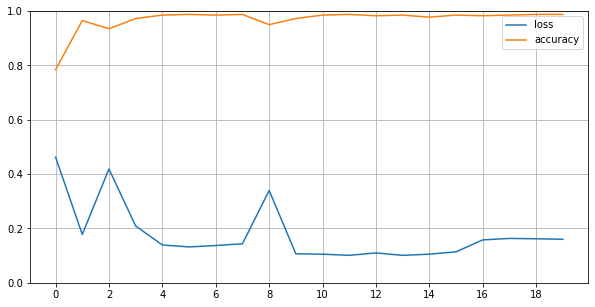

In [74]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# Set the xticks - label locations
plt.xticks(np.arange(0, 20, step=2))  

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

In [75]:
# Evaluate the model on X_test and y_test
loss, accuracy = nn_clf.evaluate(X_test, y_test)

6/6 [==============================] - 0s 799us/step - loss: 0.2943 - accuracy: 0.9766


In [76]:
# Minimum Required Accuracy: 0.97
round(accuracy, 2)

0.98